In [81]:
import pandas as pd

In [82]:
# reads file
df = pd.read_csv("./2010-2021.csv")
# gets list of column names so that there are no typos
df.columns.tolist()

['BOROUGH',
 'NEIGHBORHOOD',
 'TYPE OF HOME',
 'NUMBER OF SALES',
 'LOWEST SALE PRICE',
 'AVERAGE SALE PRICE',
 'MEDIAN SALE PRICE',
 'HIGHEST SALE PRICE',
 'YEAR']

In [83]:
# gets a list of unique entries under specified column
df['BOROUGH'].unique()

array(['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [84]:
# create grouping of data using specified column
groupby_borough = df.groupby(['BOROUGH'])

# creates a copy of specified entry within the column group
manhattan = groupby_borough.get_group(('MANHATTAN',)).copy()
manhattan.drop('LOWEST SALE PRICE', axis=1, inplace=True)
manhattan.drop('HIGHEST SALE PRICE', axis=1, inplace=True)
manhattan

,BOROUGH,NEIGHBORHOOD,TYPE OF HOME,NUMBER OF SALES,AVERAGE SALE PRICE,MEDIAN SALE PRICE,YEAR
0,MANHATTAN,ALPHABET CITY,01 ONE FAMILY HOMES,1,593362,593362,2010
1,MANHATTAN,ALPHABET CITY,02 TWO FAMILY HOMES,1,1320000,1320000,2010
2,MANHATTAN,ALPHABET CITY,03 THREE FAMILY HOMES,1,900000,900000,2010
3,MANHATTAN,CHELSEA,01 ONE FAMILY HOMES,2,2875000,2875000,2010
4,MANHATTAN,CHELSEA,02 TWO FAMILY HOMES,2,2603107,2603107,2010
...,...,...,...,...,...,...,...
6617,MANHATTAN,WASHINGTON HEIGHTS LOWER,01 ONE FAMILY HOMES,4,2456250,2450000,2021
6618,MANHATTAN,WASHINGTON HEIGHTS LOWER,02 TWO FAMILY HOMES,5,1577900,1600000,2021
6619,MANHATTAN,WASHINGTON HEIGHTS LOWER,03 THREE FAMILY HOMES,1,5200000,5200000,2021
6620,MANHATTAN,WASHINGTON HEIGHTS UPPER,02 TWO FAMILY HOMES,3,1416667,1400000,2021


In [85]:
# get unique groups by home type
manhattan['TYPE OF HOME'].unique()

array(['01 ONE FAMILY HOMES', '02 TWO FAMILY HOMES',
       '03 THREE FAMILY HOMES'], dtype=object)

In [86]:
# group further by home type
groupby_home = manhattan.groupby(['TYPE OF HOME'])
one = groupby_home.get_group(('01 ONE FAMILY HOMES',)).copy()
two = groupby_home.get_group(('02 TWO FAMILY HOMES',)).copy()
three = groupby_home.get_group(('03 THREE FAMILY HOMES',)).copy()

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# group home type into neighborhood - ONE
hood_names_one = one['NEIGHBORHOOD'].unique()
groupby_hood = one.groupby(['NEIGHBORHOOD'])
# run the code using print(h) to get problem data and we hard code this
# this way the CVS file doesn't get modified continuously
# not enough data, to split the data 80/20
small_sample = ["FASHION", "FLATIRON"] 

dic_one = {}
for h in hood_names_one:
    temp = groupby_hood.get_group((h,)).copy()
    # print(h)
    if h in small_sample:
        dic_one[h] = temp['AVERAGE SALE PRICE'].item()
    else:
        X = temp[['YEAR', 'MEDIAN SALE PRICE', 'NUMBER OF SALES']] # independent variables table
        y = temp['AVERAGE SALE PRICE']
    
        # split the data 80/20
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
        # fit model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # compare to test data
        y_pred = model.predict(X_test)
        dic_one[h] = y_pred[0]



In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

hood_names_two = two['NEIGHBORHOOD'].unique()
groupby_hood = two.groupby(['NEIGHBORHOOD'])
small_sample = ["CHINATOWN", "JAVITS CENTER", "LITTLE ITALY"] 

dic_two = {}
for h in hood_names_two:
    temp = groupby_hood.get_group((h,)).copy()
    # print(h)
    if h in small_sample:
        dic_two[h] = temp['AVERAGE SALE PRICE'].item()
    else:
        X = temp[['YEAR', 'MEDIAN SALE PRICE', 'NUMBER OF SALES']] # independent variables table
        y = temp['AVERAGE SALE PRICE']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        dic_two[h] = y_pred[0]

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

hood_names_three = three['NEIGHBORHOOD'].unique()
groupby_hood = three.groupby(['NEIGHBORHOOD'])
small_sample = ["MIDTOWN WEST", "HARLEM-WEST"] 

dic_three = {}
for h in hood_names_three:
    temp = groupby_hood.get_group((h,)).copy()
    # print(h)
    if h in small_sample:
        dic_three[h] = temp['AVERAGE SALE PRICE'].item()
    else:
        X = temp[['YEAR', 'MEDIAN SALE PRICE', 'NUMBER OF SALES']]
        y = temp['AVERAGE SALE PRICE']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        dic_three[h] = y_pred[0]

In [90]:
import geopandas as gpd
shape = gpd.read_file("./nynta2020_24b/nynta2020.shp")
shape.columns.tolist()

['BoroCode',
 'BoroName',
 'CountyFIPS',
 'NTA2020',
 'NTAName',
 'NTAAbbrev',
 'NTAType',
 'CDTA2020',
 'CDTAName',
 'Shape_Leng',
 'Shape_Area',
 'geometry']

In [91]:
to_drop = shape[shape["BoroName"] != "Manhattan"].index 
shape.drop(to_drop, inplace=True) # removes all borough that isn't Manhattan

# removes all other columns that we don't really care for
shape = shape.drop(columns=["BoroCode", "BoroName", "CountyFIPS", "NTA2020", "NTAAbbrev", "NTAType", "CDTA2020", "Shape_Leng", "Shape_Area", "CDTAName"])

shape['NTAName'].unique()

array(['Financial District-Battery Park City', 'Tribeca-Civic Center',
       'The Battery-Governors Island-Ellis Island-Liberty Island',
       'SoHo-Little Italy-Hudson Square', 'Greenwich Village',
       'West Village', 'Chinatown-Two Bridges', 'Lower East Side',
       'East Village', 'Chelsea-Hudson Yards', "Hell's Kitchen",
       'Midtown South-Flatiron-Union Square', 'Midtown-Times Square',
       'Stuyvesant Town-Peter Cooper Village', 'Gramercy',
       'Murray Hill-Kips Bay', 'East Midtown-Turtle Bay',
       'United Nations', 'Upper West Side-Lincoln Square',
       'Upper West Side (Central)', 'Upper West Side-Manhattan Valley',
       'Upper East Side-Lenox Hill-Roosevelt Island',
       'Upper East Side-Carnegie Hill', 'Upper East Side-Yorkville',
       'Morningside Heights', 'Manhattanville-West Harlem',
       'Hamilton Heights-Sugar Hill', 'Harlem (South)', 'Harlem (North)',
       'East Harlem (South)', 'East Harlem (North)', "Randall's Island",
       'Washington 

In [92]:
hood_names_one
# this is going to be a major problem, need to spend some time to do some self data matching

array(['ALPHABET CITY', 'CHELSEA', 'CLINTON', 'EAST VILLAGE', 'GRAMERCY',
       'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-UPPER', 'INWOOD', 'LITTLE ITALY',
       'MIDTOWN EAST', 'MURRAY HILL', 'SOHO', 'SOUTHBRIDGE', 'TRIBECA',
       'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
       'UPPER WEST SIDE (59-79)', 'UPPER WEST SIDE (79-96)',
       'UPPER WEST SIDE (96-116)', 'WASHINGTON HEIGHTS LOWER', 'KIPS BAY',
       'FASHION', 'HARLEM-EAST', 'MANHATTAN VALLEY', 'FLATIRON',
       'WASHINGTON HEIGHTS UPPER', 'HARLEM-WEST', 'LOWER EAST SIDE'],
      dtype=object)

In [98]:
hood_matches_one = {
    'Financial District-Battery Park City': 'SOUTHBRIDGE',
    'Tribeca-Civic Center': 'TRIBECA',
    'The Battery-Governors Island-Ellis Island-Liberty Island': None,
    'SoHo-Little Italy-Hudson Square': ['SOHO', 'LITTLE ITALY'],
    'Greenwich Village': 'GREENWICH VILLAGE-CENTRAL',
    'West Village': 'GREENWICH VILLAGE-WEST',
    'Chinatown-Two Bridges': None,
    'Lower East Side': 'LOWER EAST SIDE',
    'East Village': ['EAST VILLAGE', 'ALPHABET CITY'],
    'Chelsea-Hudson Yards': 'CHELSEA',
    'Hell\'s Kitchen': 'CLINTON',
    'Midtown South-Flatiron-Union Square': 'FLATIRON',
    'Midtown-Times Square': 'MIDTOWN EAST',
    'Stuyvesant Town-Peter Cooper Village': None,
    'Gramercy': 'GRAMERCY',
    'Murray Hill-Kips Bay': ['MURRAY HILL', 'KIPS BAY'],
    'East Midtown-Turtle Bay': None,
    'United Nations': None,
    'Upper West Side-Lincoln Square': ['UPPER WEST SIDE (59-79)', 'UPPER WEST SIDE (79-96)'],
    'Upper West Side (Central)': 'UPPER WEST SIDE (79-96)',
    'Upper West Side-Manhattan Valley': ['MANHATTAN VALLEY', 'UPPER WEST SIDE (96-116)'],
    'Upper East Side-Lenox Hill-Roosevelt Island': 'UPPER EAST SIDE (59-79)',
    'Upper East Side-Carnegie Hill': 'UPPER EAST SIDE (79-96)',
    'Upper East Side-Yorkville': None,
    'Morningside Heights': None,
    'Manhattanville-West Harlem': 'HARLEM-CENTRAL',
    'Hamilton Heights-Sugar Hill': 'HARLEM-WEST',
    'Harlem (South)': 'HARLEM-EAST',
    'Harlem (North)': 'HARLEM-UPPER',
    'East Harlem (South)': 'HARLEM-EAST',
    'East Harlem (North)': 'HARLEM-UPPER',
    'Randall\'s Island': None,
    'Washington Heights (South)': 'WASHINGTON HEIGHTS LOWER',
    'Washington Heights (North)': 'WASHINGTON HEIGHTS UPPER',
    'Inwood': 'INWOOD',
    'Highbridge Park': None,
    'Inwood Hill Park': None,
    'Central Park': None
}

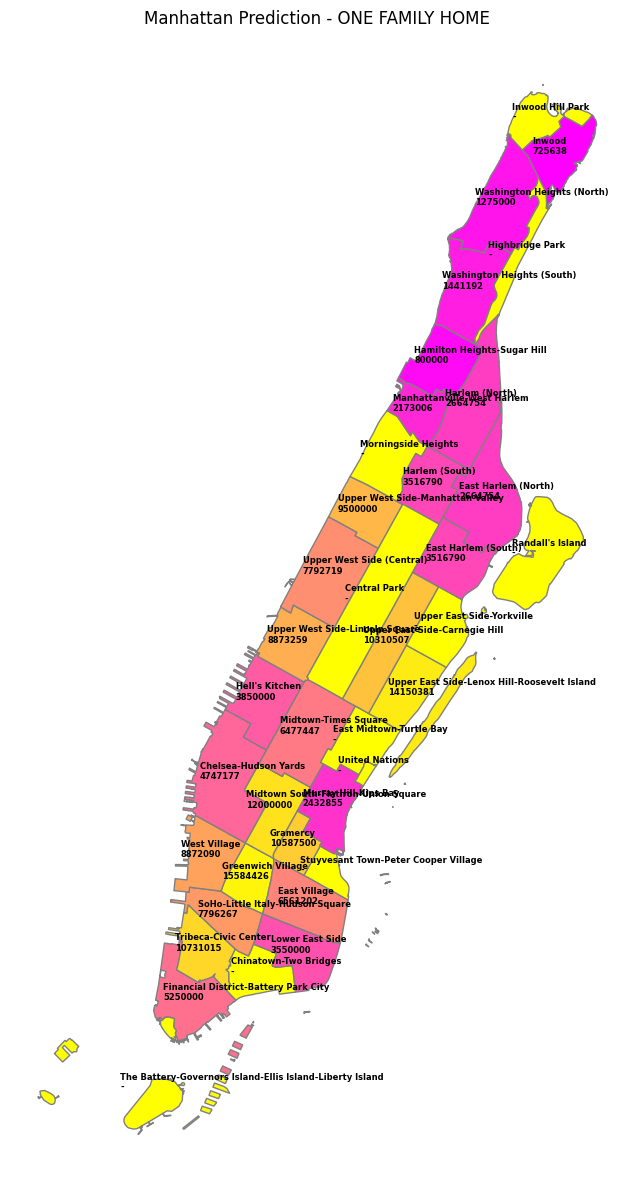

In [99]:
import matplotlib.pyplot as plt

shape['sales'] = "-"

# adding sales data to overall df
for i, row in shape.iterrows():
    holder = hood_matches_one[row['NTAName']]
    if holder:
        if isinstance(holder, list):
            sum = 0
            for e in holder:
                sum += dic_one[e]
            shape.at[i, 'sales'] = int(sum/len(holder))
        else:
            shape.at[i, 'sales'] = int(dic_one[holder])

# sets map settings
shape_map = shape.plot(column='sales', k=8, cmap='spring', figsize=(30,15), linewidth=1, edgecolor='0.5')
# adds labels to map
for i, row in shape.iterrows():
    x = row['geometry'].centroid.x
    y = row['geometry'].centroid.y
    if row['sales'] != "-" :
        label = row['NTAName'] + "\n" + str(row['sales'])
        shape_map.annotate(label, xy=(x, y), xytext=(-20, 0), color="black", textcoords="offset points", fontsize=6, weight="bold")
# draws the map
shape_map.set(title="Manhattan Prediction - ONE FAMILY HOME")
shape_map.set_axis_off()

In [ ]:
shape